In [27]:
%pip install pandas
%pip install sklearn
%pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



ERROR: Could not find a version that satisfies the requirement sklearn (from versions: none)
ERROR: No matching distribution found for sklearn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [28]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

In [30]:
iris = pd.read_csv('test_files/iris.csv')
iris_test = pd.read_csv('test_files/test_iris.csv')
result_records = pd.read_csv('test_files/result_records.csv', header=None, names=['pca1', 'pca2'])
result_targets = pd.read_csv('test_files/result_targets.csv', header=None, names=['clusters'])

In [31]:
scaler = StandardScaler().fit(iris_test)
iris_scaler = scaler.transform(iris_test)

pca = PCA(n_components=2).fit(iris_scaler)
iris_pca = pca.transform(iris_scaler)

kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(iris_pca)
iris_kmeans = kmeans.predict(iris_pca)

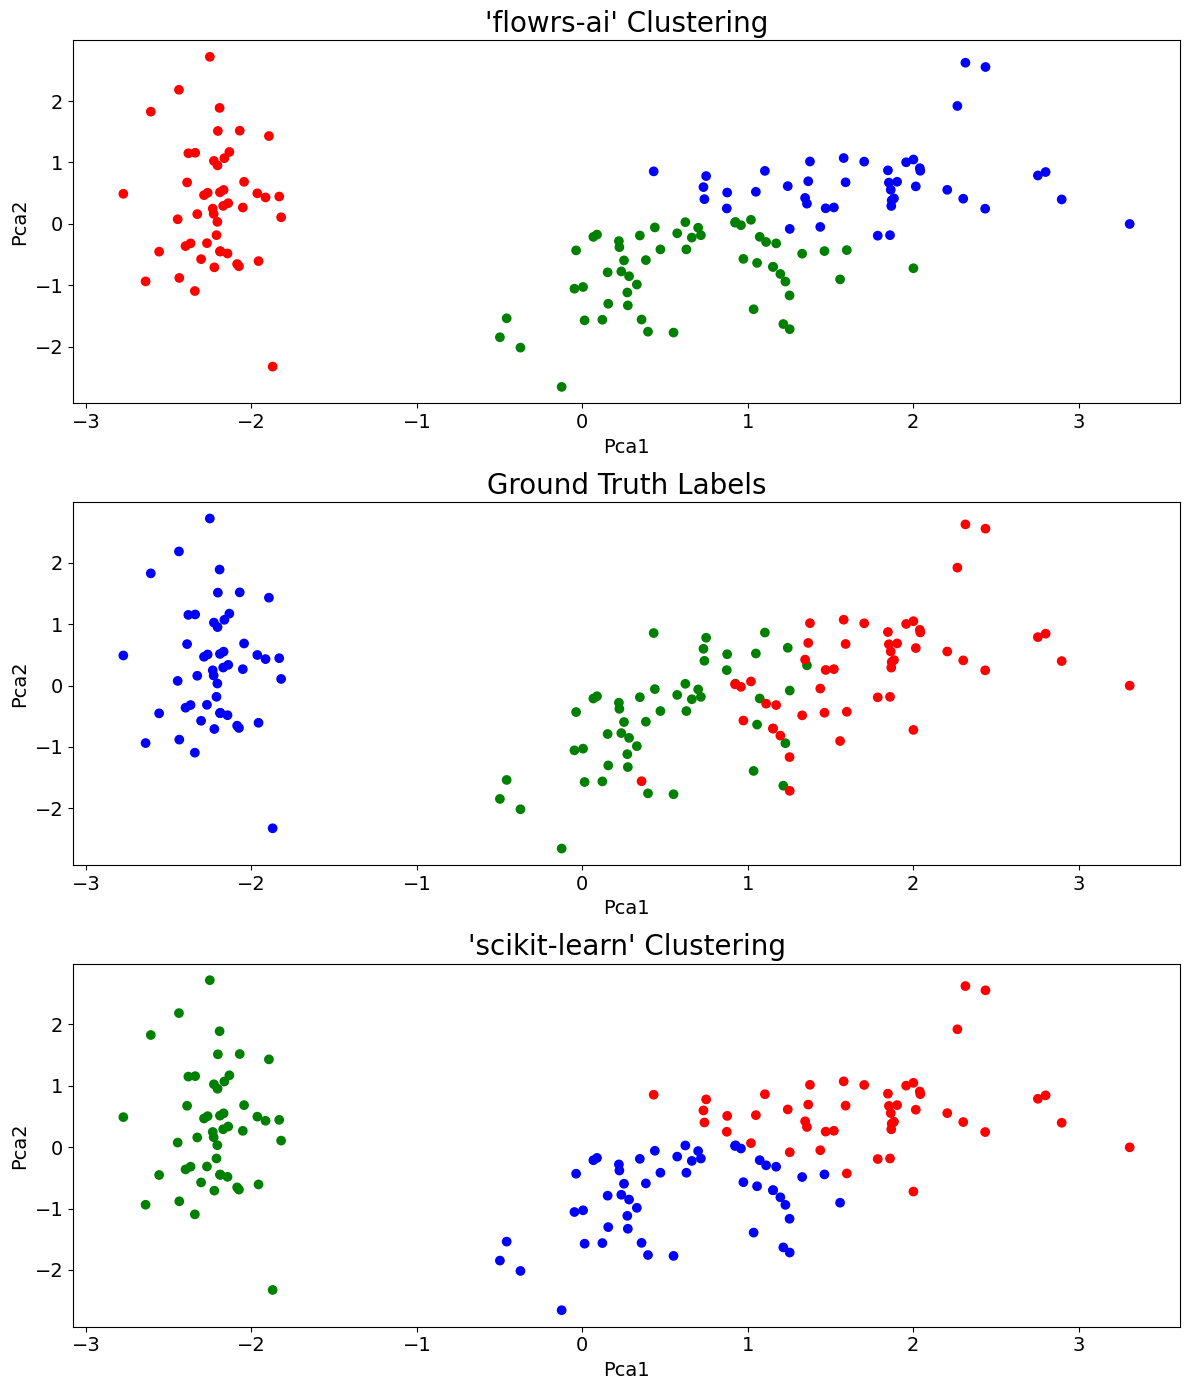

In [32]:
from matplotlib.colors import LinearSegmentedColormap


cmap = LinearSegmentedColormap.from_list('mycmap', colors = ['BLUE', 'GREEN', 'RED'], N=3)

plt.figure(figsize=(12,14))
plt.subplot(3, 1, 1)
plt.title("'flowrs-ai' Clustering", fontsize=20)
plt.scatter(result_records['pca1'], result_records['pca2'], c=result_targets['clusters'], cmap=cmap)
plt.xlabel('Pca1', fontsize=14)
plt.ylabel('Pca2', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)

plt.subplot(3, 1, 2)
plt.title('Ground Truth Labels', fontsize=20)
plt.scatter(result_records['pca1'], result_records['pca2'], c=iris['species'].map({'setosa': 1, 'versicolor': 2, 'virginica': 3}), cmap=cmap)
plt.xlabel('Pca1', fontsize=14)
plt.ylabel('Pca2', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)

plt.subplot(3, 1, 3)
plt.title("'scikit-learn' Clustering", fontsize=20)
plt.scatter(iris_pca[:,0], iris_pca[:,1], c=iris_kmeans, cmap=cmap)
plt.xlabel('Pca1', fontsize=14)
plt.ylabel('Pca2', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)

plt.tight_layout()
plt.show()

In [33]:
nodes = ['l1normscaler', 'l2normscaler', 'maxnormscaler', 'standardscaler', 'minmaxscaler', 'minmaxrangescaler', 'maxabsscaler', 'diffusionmap', 'pca', 'tsne', 'dbscan', 'kmeans']
N = 10_000
rust_times =[77.4006 / N, 72.4366 / N, 78.979 / N, 213.2245 / N, 130.1095 / N, 125.2255/ N, 22.3656 / N, 103962.2601 / N, 522.3261 / N, 186712.2769 / 100,  5449.7486 / N, 37576.3299 / N]
wasm_times =[0, 0, 0, 0, 0, 0, 0, 250288.30000029504 / N, 895.8999998122454 / N, 43550, 6439 / N, 29681 / N]

[]

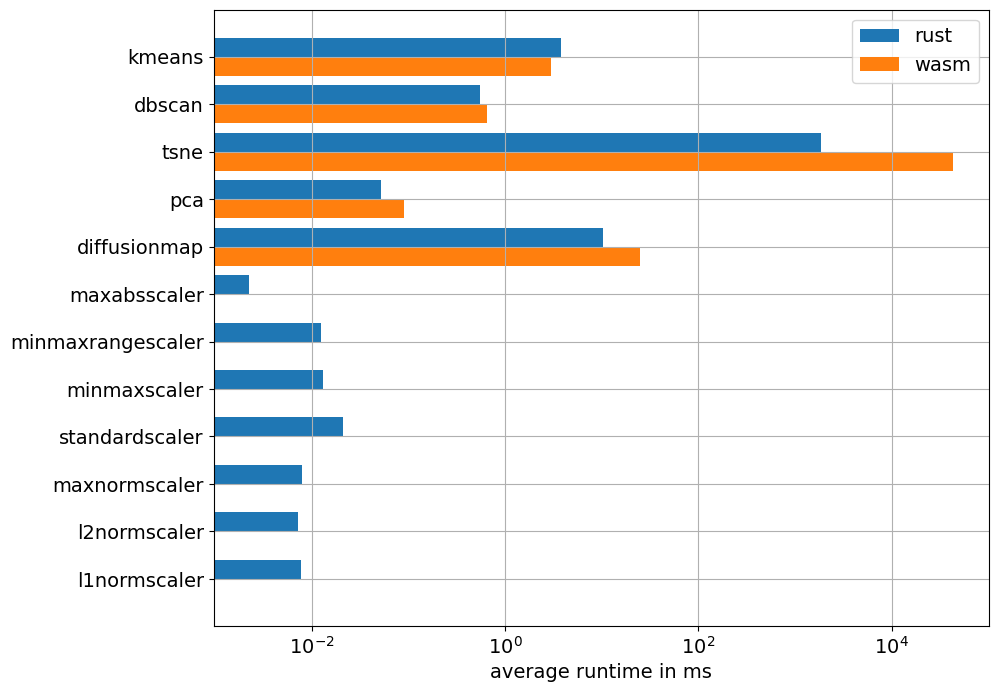

In [34]:
y_axis = np.arange(len(nodes))

plt.figure(figsize=(10,8))
plt.barh(y_axis+0.2, rust_times, 0.4, log=True, label='rust')
plt.barh(y_axis-0.2, wasm_times, 0.4,  log=True, label='wasm')

plt.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel('average runtime in ms', fontsize=14)
plt.yticks(y_axis, nodes)
plt.grid()
plt.legend(fontsize=14)
plt.plot()